https://www.datacamp.com/community/tutorials/random-forests-classifier-python#algorithm

In [1]:
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import joblib
from collections import defaultdict
%matplotlib inline

In [2]:
def plot_cell_by_predicted_layers(_cells_dataframe, _predict_layers, _truth_layers=None):
    X=_cells_dataframe['Centroid X µm'].to_numpy(dtype=np.float64)
    Y=_cells_dataframe['Centroid Y µm'].to_numpy(dtype=np.float64)
    
    layers_dict = defaultdict(list)
    wrong_cells_dict = defaultdict(list)
    for index, value in enumerate(_predict_layers):
        layers_dict[value].append([X[index], Y[index]])
        if _truth_layers:
            if _truth_layers[index] is not _predict_layers[index]:
                wrong_cells_dict[_truth_layers[index]].append([X[index], Y[index]])


    plt.figure(figsize=(14,14))
    ax = plt.gca()
    ax.invert_yaxis()
    
    

    layer_color = {'Layer 1': 'black',
                   'Layer 2': 'cyan',
                   'Layer 3': 'brown',
                   'Layer 4': 'blue',
                   'Layer 5': 'green',
                   'Layer 6 a': 'orange',
                   'Layer 6 b': 'red',
                  }
    for layer_name, coor_list in layers_dict.items():
        coor = np.array(coor_list)
        color = layer_color[layer_name]
        plt.scatter(coor[:,0], coor[:, 1] , s=20, alpha=0.7, c=color)
        
    if _truth_layers:
        for layer_name, coor_list in wrong_cells_dict.items():
            coor = np.array(coor_list)
            color = layer_color[layer_name]
            plt.scatter(coor[:,0], coor[:, 1] , s=1, alpha=1., c=color)


    plt.title('Origin points per layer')
    leg = plt.legend(layer_color.keys())
    for index, color in enumerate(layer_color.values()):
        leg.legendHandles[index].set_color(color)
    plt.show()

In [3]:
#detection_path = '/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Training/SLD_0000404.vsi - 20x_01_JPR_v2_done Detections.txt'
'/Users/jacquemi/working_dir/Rat_Nissl
detection_dataframe = pd.read_csv(detection_path, sep='	|\t', engine='python')
#annotations_dataframe = to_dataframe('/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/SLD_0000406.vsi - 20x_01_JPR_v2_done_annotations.json')
#s1_pixel_coordinates, quadrilateral_pixel_coordinates = read_qupath_annotations('/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Layer_ground_truth/SLD_0000406.vsi - 20x_01_JPR_v2_done_annotations.json')

In [14]:
features = ['Area µm^2', 'Length µm', 'Solidity',
            'Max diameter µm', 'Min diameter µm', 'Hematoxylin: Mean', 'Hematoxylin: Median', 'Hematoxylin: Min', 'Hematoxylin: Max',
            'Hematoxylin: Std.Dev.', 'DAB: Mean', 'DAB: Median', 'DAB: Min', 'DAB: Max', 'DAB: Std.Dev.',
            'Smoothed: 50 µm: Area µm^2', 'Smoothed: 50 µm: Length µm', 
            'Smoothed: 50 µm: Solidity', 'Smoothed: 50 µm: Max diameter µm', 'Smoothed: 50 µm: Min diameter µm',
            'Smoothed: 50 µm: Nearby detection counts', 'Delaunay: Num neighbors', 'Delaunay: Mean distance',
            'Delaunay: Median distance', 'Delaunay: Max distance', 'Delaunay: Min distance', 'Delaunay: Mean triangle area',
            'Delaunay: Max triangle area', 'Distance to annotation with Outside Pia µm']
           


X=detection_dataframe[features]
y=detection_dataframe['Class']

In [15]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [16]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9447935368043088


## Finding Important Features in Scikit-learn

In [18]:
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Distance to annotation with Outside Pia µm    0.499328
Smoothed: 50 µm: Area µm^2                    0.066370
Smoothed: 50 µm: Max diameter µm              0.048518
Smoothed: 50 µm: Length µm                    0.046426
Smoothed: 50 µm: Min diameter µm              0.043848
Smoothed: 50 µm: Nearby detection counts      0.031656
Smoothed: 50 µm: Solidity                     0.016593
Min diameter µm                               0.013238
Area µm^2                                     0.013045
DAB: Max                                      0.012857
Hematoxylin: Max                              0.012826
Hematoxylin: Min                              0.012817
Delaunay: Min distance                        0.012542
Max diameter µm                               0.012332
Delaunay: Mean triangle area                  0.011996
Length µm                                     0.011965
Delaunay: Max triangle area                   0.011870
Hematoxylin: Std.Dev.                         0.011731
Delaunay: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


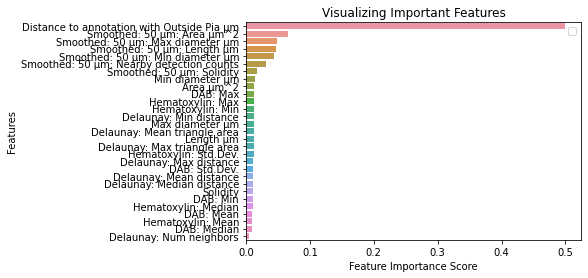

In [22]:

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [24]:
# Save the Random Forest
# save
joblib.dump(clf, "/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Training/SLD_0000404.vsi - 20x_01_JPR_v2_done")

['/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Training/SLD_0000404.vsi - 20x_01_JPR_v2_done']

In [25]:
# load, no need to initialize the loaded_rf
loaded_clf = joblib.load("/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Training/SLD_0000404.vsi - 20x_01_JPR_v2_done")

/Users/jacquemi/working_dir/Rat_Nissl/rat_venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


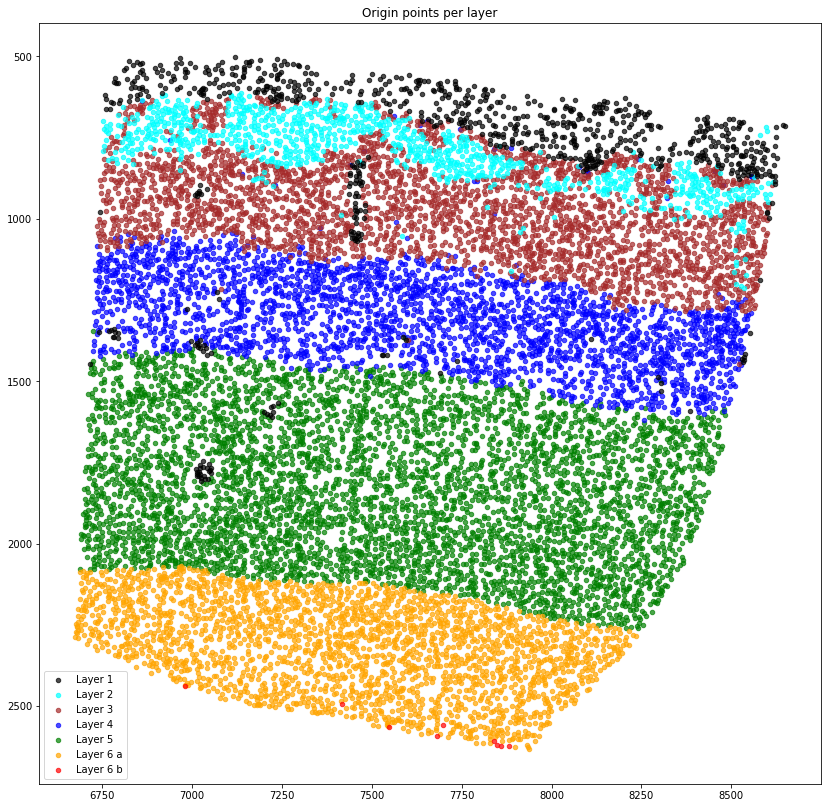

In [28]:
path = '/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Validation/'
for name in ['SLD_0000431.vsi - 20x_03 Detections.txt']:

    detection_dataframe = pd.read_csv(path + name, sep='	|\t', engine='python')
    predict_layers = loaded_clf.predict(detection_dataframe[features].values)
    plot_cell_by_predicted_layers(detection_dataframe, predict_layers)



# Test the random forest on other brain slices

In [90]:
taining_path = '/Users/jacquemi/working_dir/Rat_Nissl/15FebruaryProject/Classifier_Training_Jean/QuPathExport/Training/Layer_ground_truth/Validation/'
detection_dataframe = to_dataframe(taining_path + 'SLD_0000431.vsi - 20x_03 Detections.txt')

INFO: Convert the raw data to a pandas dataframe


In [91]:
predict_layers = loaded_clf.predict(detection_dataframe[features].values)

/Users/jacquemi/working_dir/cellpose/cellpose/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [92]:
print("Accuracy:",metrics.accuracy_score(list(detection_dataframe['Class']), predict_layers))

Accuracy: 0.7248346536812268


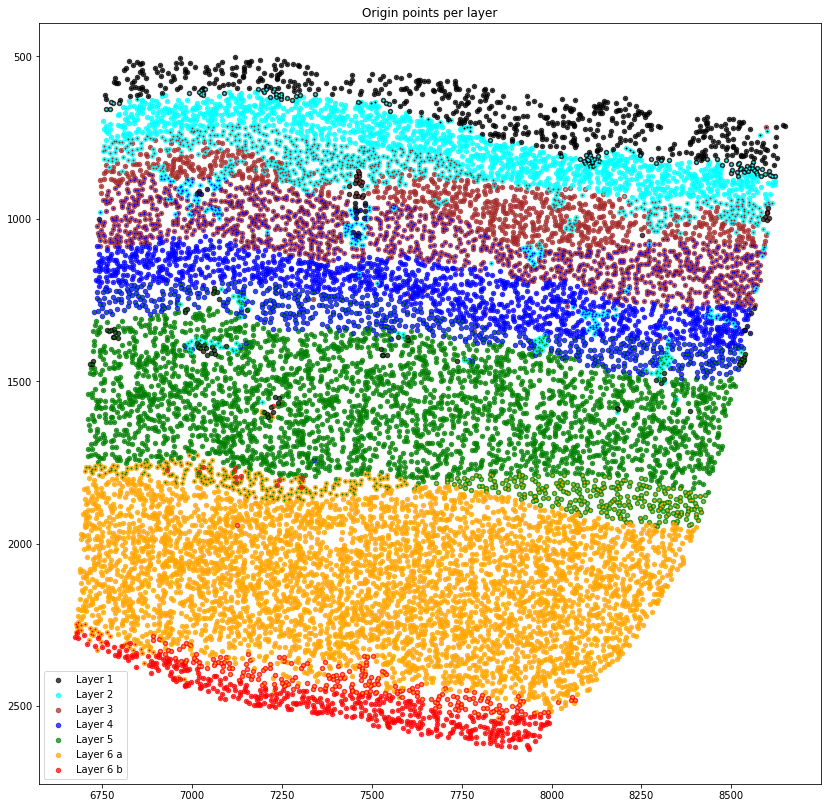

In [93]:
plot_cell_by_predicted_layers(detection_dataframe, predict_layers, list(detection_dataframe['Class']))